<a href="https://colab.research.google.com/github/blasce/MNIST-DIGITS/blob/main/MNIST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

#Data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from numpy.core.fromnumeric import shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Visualize examples

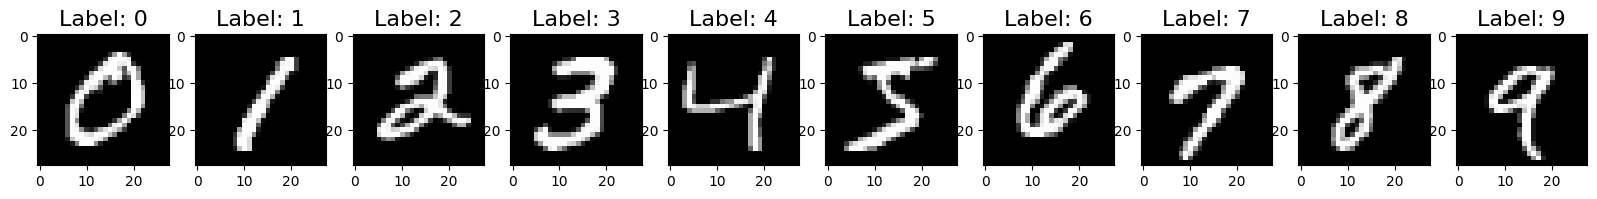

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap = 'gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)


In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Prepare Data

In [ ]:
# Normalize Data
x_train = x_train / 255.0 #we divide by 255 to get smaller values (0.0-1.0)
x_test = x_test / 255.0

# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# create model - fully connected neural network

In [ ]:
model = Sequential()

model.add(Dense(units = 128, input_shape = (784,), activation ='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation ='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#Train


In [ ]:
batch_size = 512
epochs= 10
model.fit(x=x_train, y=y_train, batch_size = batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 18ms/step - loss: 0.0489 - accuracy: 0.9849
Epoch 2/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0442 - accuracy: 0.9863
Epoch 3/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0405 - accuracy: 0.9881
Epoch 4/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0375 - accuracy: 0.9883
Epoch 5/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0312 - accuracy: 0.9907
Epoch 6/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0294 - accuracy: 0.9909
Epoch 7/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0274 - accuracy: 0.9918
Epoch 8/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0248 - accuracy: 0.9924
Epoch 9/10
118/118 [==============================] - 2s 18ms/step - loss: 0.0223 - accuracy: 0.9933
Epoch 10/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0211 - accura

#Evaluate

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0742 - accuracy: 0.9795
Test Loss: 0.0742022916674614, Test Accuracy: 0.9794999957084656


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[5.7592263e-08 3.1522889e-06 1.9964200e-05 ... 9.9975252e-01
  1.3349063e-07 6.5433375e-07]
 [7.3778969e-12 2.7078599e-07 9.9999970e-01 ... 1.0569937e-12
  3.8548598e-11 3.1829304e-15]
 [8.4389313e-09 9.9974251e-01 9.9090576e-06 ... 1.5943784e-04
  4.3887452e-05 1.7868982e-06]
 ...
 [7.5676713e-12 9.5411501e-10 2.1286353e-09 ... 8.4086167e-08
  1.0326493e-07 7.2314542e-06]
 [4.9407380e-13 4.1039283e-10 4.0325568e-14 ... 7.4187515e-13
  3.1991865e-06 6.9737000e-13]
 [4.3201383e-11 4.9457790e-13 1.7108702e-12 ... 6.8758257e-17
  1.1123950e-12 3.1593750e-17]]
[7 2 1 ... 4 5 6]


# Single Example

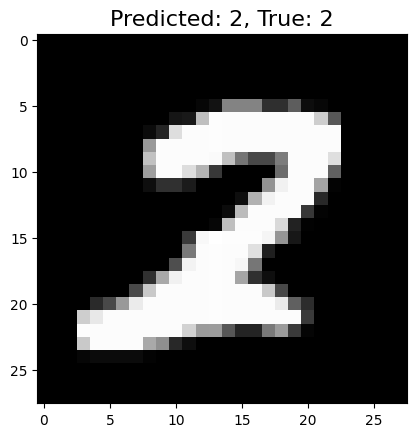

In [ ]:
randi = np.random.choice(len(x_test))
x_sample = x_test[randi]
y_true = np.argmax(y_test,axis=1)
y_sample_true = y_true[randi]
y_sample_pred_class = y_pred_classes[randi]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

#Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

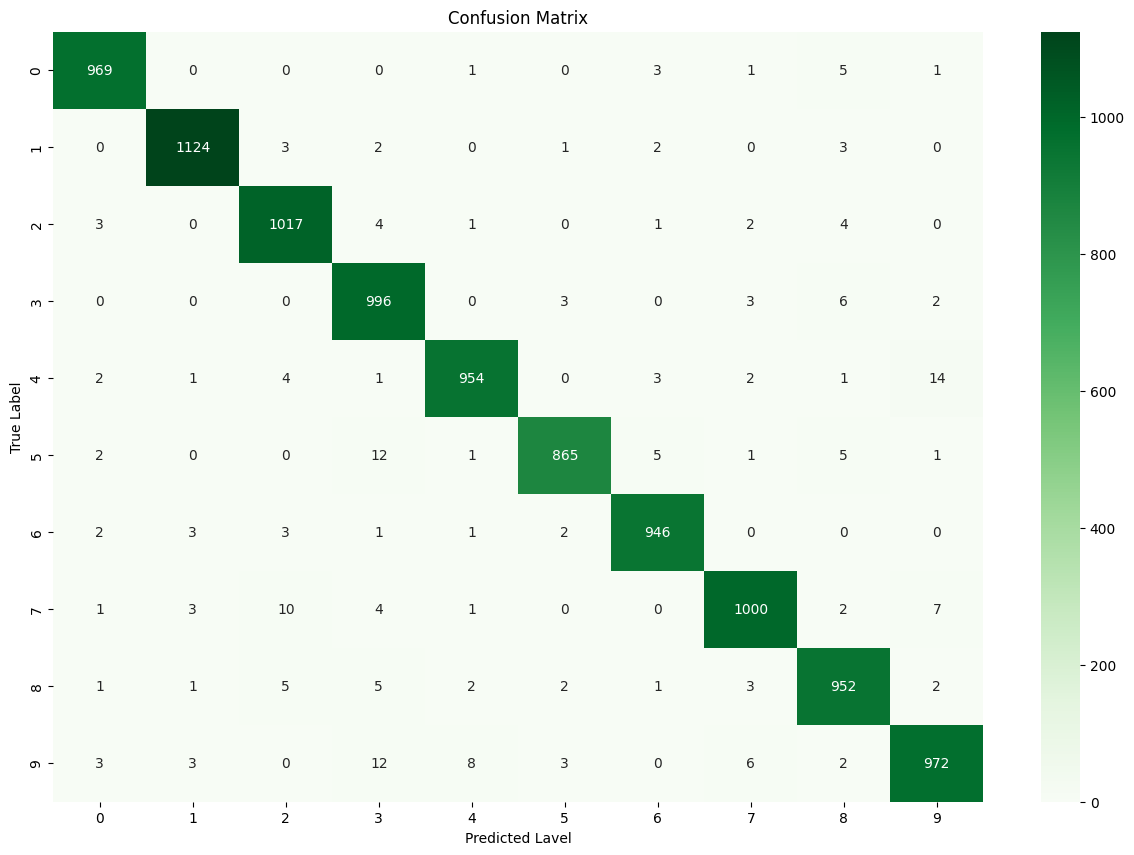

In [ ]:
cmatrix = confusion_matrix(y_true, y_pred_classes)

#Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(cmatrix, annot = True, fmt='d',ax=ax, cmap="Greens")
ax.set_xlabel('Predicted Lavel')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')
